# ¡Hola, Yair!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

In [1]:
#importar librerias
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#leer librerias
hypotheses=pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
orders=pd.read_csv('/datasets/orders_us.csv')
visits=pd.read_csv('/datasets/visits_us.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta importación de datos y librerías.
</div>

In [3]:
#arreglar las columnas de hypotheses
hypotheses.columns = hypotheses.columns.str.lower().str.replace(' ', '_')

In [4]:
#poner formato de fecha a orders
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#arreglar las columnas de orders
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
#poner formato de fecha a visits
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#arreglar las columnas de visits
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [5]:
#borrar los duplicados de orders

# Crear una Serie booleana que indica si el 'visitorid' está en ambos grupos A y B
is_in_both_groups = orders.groupby('visitorid')['group'].transform(lambda x: set(x) == {'A', 'B'})

# Filtrar las filas donde el 'visitorid' está en ambos grupos
orders = orders[~is_in_both_groups]


# Filtrar todas las filas donde el visitorid es igual a 4256040402
rows_with_visitorid = orders[orders['visitorid'] == 4256040402]

# Imprimir o trabajar con las filas resultantes
print(rows_with_visitorid)

Empty DataFrame
Columns: [transactionid, visitorid, date, revenue, group]
Index: []


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo con el método `transform`.
</div>

## Parte 1. Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [6]:
pd.set_option('display.max_colwidth', None)
hypotheses['ice']=(hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
print(hypotheses[['hypothesis','ice']].sort_values(by='ice',ascending=False))


                                                                                                               hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


Segun el framework ice la hipotesis "Launch a promotion that gives users discounts on their birthdays" es la mejor

### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [7]:
pd.set_option('display.max_colwidth', None)
hypotheses['rice']=(hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
print(hypotheses[['hypothesis','rice']].sort_values(by='rice',ascending=False))

                                                                                                               hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


segun el framework rice la tesis que se debe priorizar es  "Add a subscription form to all the main pages. This will help you compile a mailing list"

### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Text(0.5, 1.0, 'Gráfico de priorizacion de hipotesis')

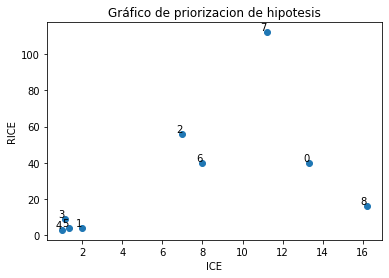

In [8]:
plt.scatter(hypotheses['ice'],hypotheses['rice'])
for i, row in hypotheses.iterrows():
    plt.text(row['ice'], row['rice'], str(row.name), ha='right', va='bottom')
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.title('Gráfico de priorizacion de hipotesis')  

en el grafico se ve claramente que la hipotesis "Add a subscription form to all the main pages. This will help you compile a mailing list" es superior a las demas y deberia priorizarse

## Parte 2. Análisis de test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [9]:
# crea una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date','group']].drop_duplicates()
#obetener los datos agregados por ordenes por dia
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#obtener los datos agregados por visita poor dia
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
#juntar las dos tablas
acumulativedata=pd.merge(ordersAggregated,visitorsAggregated,left_on=['date','group'],right_on=['date','group'])
acumulativedata.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
acumulativedata

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736


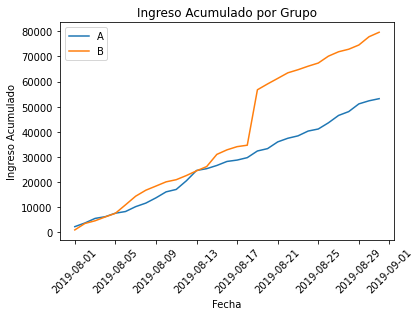

In [10]:
import matplotlib.pyplot as plt

# Datos acumulados para el grupo A
acumulativedata_a = acumulativedata[acumulativedata['group']=='A'][['date','revenue','orders']]

# Datos acumulados para el grupo B
acumulativedata_b = acumulativedata[acumulativedata['group']=='B'][['date','revenue','orders']]

# Hacer gráfico de ingresos para el grupo A
plt.plot(acumulativedata_a['date'], acumulativedata_a['revenue'], label='A')

# Hacer gráfico de ingresos para el grupo B
plt.plot(acumulativedata_b['date'], acumulativedata_b['revenue'], label='B')

plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')

plt.xticks(rotation='45')
# Añadir leyenda después de crear la figura
plt.legend()

# Mostrar el gráfico
plt.show()


de manera general el revenue aumenta durante todo la prueba pero en el caso de tratmiento experimento una fuerte subida despues de la mitad de la prueba eso se podria dar por algun dato atipico

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

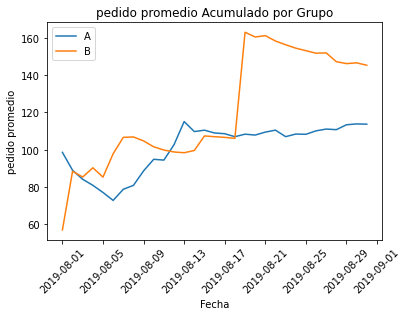

In [11]:
#tamaño de pedido por grupo a
plt.plot(acumulativedata_a['date'],acumulativedata_a['revenue']/acumulativedata_a['orders'],label='A')
#tamaño de pedido por grupo b
plt.plot(acumulativedata_b['date'],acumulativedata_b['revenue']/acumulativedata_b['orders'],label='B')
plt.title('pedido promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('pedido promedio')

plt.xticks(rotation='45')
# Añadir leyenda después de crear la figura
plt.legend()

# Mostrar el gráfico
plt.show()


en este caso el tamaño de pedido acumulado al igual que en el revenue en el caso de tratamiento b hay un pico despues de la mitad de la prueba lo cual podria indicar un pedido muy costoso

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

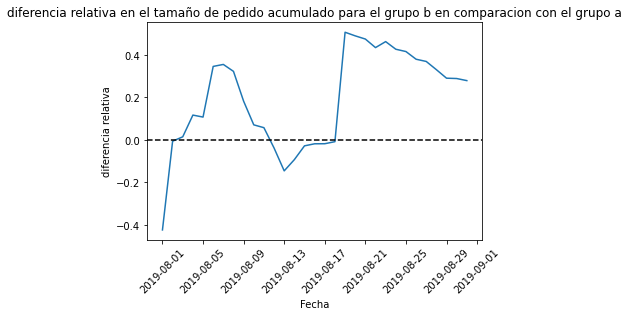

In [12]:
mergedacumulative=pd.merge(acumulativedata_a,acumulativedata_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedacumulative['date'],((mergedacumulative['revenueB']/mergedacumulative['ordersB'])/(mergedacumulative['revenueA']/mergedacumulative['ordersA'])-1))
# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('diferencia relativa en el tamaño de pedido acumulado para el grupo b en comparacion con el grupo a')
plt.xlabel('Fecha')
plt.ylabel('diferencia relativa')

plt.xticks(rotation='45')


# Mostrar el gráfico
plt.show()


en este grafico se ve la coincidencia con los anteriores donde hay picos altos en los pedidos de b con los del grupo a

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

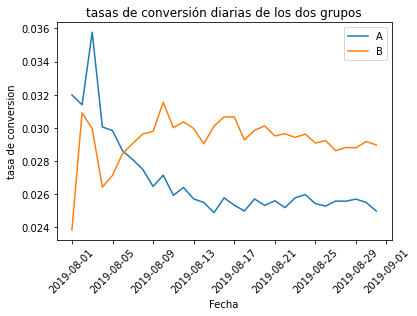

In [13]:
#calcular la conversion
acumulativedata['conversion']=acumulativedata['orders']/acumulativedata['visitors']
#conversion del grupo a
acumulative_a=acumulativedata[acumulativedata['group']=='A']
#conversion del grupo  b
acumulative_b=acumulativedata[acumulativedata['group']=='B']
#grafico de tasa de conversion de a
plt.plot(acumulative_a['date'],acumulative_a['conversion'],label='A')
#grafico de tasa de conversion de b
plt.plot(acumulative_b['date'],acumulative_b['conversion'],label='B')
plt.legend()
plt.title('tasas de conversión diarias de los dos grupos')
plt.xlabel('Fecha')
plt.ylabel('tasa de conversion')

plt.xticks(rotation='45')
# Añadir leyenda después de crear la figura
plt.legend()

# Mostrar el gráfico
plt.show()


al inicio se encontraba una conversion alta en mabos grupos pero eso ahora es irrelevante porque la tasa de conversion ahora se estabilizo poniendo al grupo b de tratamiento por encima del a

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

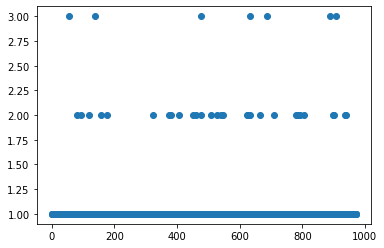

In [14]:
# Calcular el número de pedidos por usuario
orderbyuser = orders.drop(['date','revenue','group'],axis=1).groupby('visitorid',as_index=False).agg({'transactionid':pd.Series.nunique})
orderbyuser.columns=['userid','orders']
# gráfico de dispersión
x_values = pd.Series(range(0,len(orderbyuser)))

plt.scatter(x_values, orderbyuser['orders']) 


la mayoria de usuarios hizo solo un pedido pero no conocemos la proporcion que hizo dos o mas

### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [15]:
print(np.percentile(orderbyuser['orders'], [ 95, 99])) 

[1. 2.]


los datos que se considerarian anomalos serian los mayores o igual a 2

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección.
</div>

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

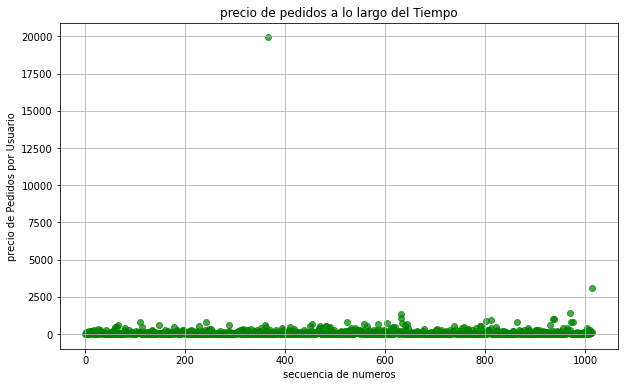

In [16]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'], color='green', marker='o', alpha=0.7)
plt.title('precio de pedidos a lo largo del Tiempo')
plt.xlabel('secuencia de numeros')
plt.ylabel('precio de Pedidos por Usuario')
plt.grid(True)
plt.show()


a medida que pasa el tiempo los precios de los pedidos aumentan casi constantemente

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [17]:
print(np.percentile(orders['revenue'], [ 95, 99])) 

[414.275 830.3  ]


los datos se convierten en una anomalia a partir de 414

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho.
</div>

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [22]:
#hallar las ordenes de usuarios del grupo a
ordersbyusersa = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersbyusersa.columns = ['userid', 'orders']
#hallar las ordenes de usuarios del grupo b
ordersbyusersb=orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersbyusersb.columns = ['userid', 'orders']
#crear todas los pedidos del grupo a
samplea = pd.concat([ordersbyusersa['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersbyusersa['orders'])), name='orders')],axis=0)
#crear todos los pedidos del grupo b
sampleb = pd.concat([ordersbyusersb['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersbyusersb['orders'])), name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(samplea, sampleb)[1]))

print("{0:.3f}".format(sampleb.mean()/samplea.mean()-1)) 
sampleb

0.011
0.160


0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

h0(hipotesis nula)=no hay diferencia significativa en la conversion entre los grupos

h1(hipotesis alternativa)= si hay diferencia significativa en la conversion entre los grupos


La primera fila de la salida nos da el valor p — 0,011, que es menor que 0,05. Entonces,  podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los grupos. Pero la ganancia relativa del grupo B es del 16% .

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [19]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


h0(hipotesis nula)=no hay diferencia significativa en el tamaño promedio de pedido entre los grupos


h1(hipotesis alternativa)= hay diferencia significativa en el tamaño promedio de pedido entre los grupos


El valor p es notablemente superior a 0,05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. No obstante, el tamaño de pedido promedio para el grupo B es más grande que para el grupo A.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [20]:
userswithmanyorders = pd.concat([ordersbyusersa[ordersbyusersa['orders'] >= 2]['userid'], ordersbyusersb[ordersbyusersb['orders'] >= 2]['userid']], axis = 0)
userswithexpensiveorders = orders[orders['revenue'] > 414]['visitorid']
abnormalUsers = pd.concat([userswithmanyorders, userswithexpensiveorders], axis = 0).drop_duplicates().sort_values()

sampleafiltered = pd.concat([ordersbyusersa[np.logical_not(ordersbyusersa['userid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersbyusersa['orders'])),name='orders')],axis=0)

samplebfiltered = pd.concat([ordersbyusersb[np.logical_not(ordersbyusersb['userid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersbyusersb['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleafiltered, samplebfiltered)[1]))
print("{0:.3f}".format(samplebfiltered.mean()/sampleafiltered.mean()-1)) 

0.016
0.174


h0(hipotesis nula)=no hay diferencia significativa en la conversion entre los grupos utilizando los datos filtrados


h1(hipotesis alternativa)= hay diferencia significativa en la conversion entre los grupos utilizando los datos filtrados


dado que el valor p es menor que 0.05 entonces, podemos rechazar la hipótesis nula ya que hay una diferencia estadísticamente significativa en la conversión entre los grupos y los datos anomalos no cambiaron mucho los resultados anteriores

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [21]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))
print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))

0.771
-0.033


h0(hipotesis nula)=no hay diferencia significativa en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

h1(hipotesis alternativa)= hay diferencia significativa en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados

El valor p es notablemente superior a 0,05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos.Pero en el caso de los resultados de b en funcion de a se ve que decrecio , y el grupo a es superior en los pedidos medios a b por 3.3%

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

segun la prueba de significancia estadistica se para la prueba y se concluye que hay una diferencia significativa en la conversion en este caso en favor del grupo de tratamiento osea el b y se debe estudiar porque a pesar de tener ese exito de conversion , el tamaño promedio de pedido entre los dos grupos no tiene ese diferencia significativa que se deberia ver reflejada por la conversion mas alta de un grupo con respecto a otro

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Parece ser que no se guardaron los comentarios realizados en esta sección. Agrega una conclusión general sobre lo encontrado y respondiendo al objetivo del proyecto.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos queda un solo elemento por corregir.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Todo corregido! Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>

+++